In [1]:
# The data contains information from the 1990 California census


# longitude: A measure of how far west a house is; a higher value is farther west

# latitude: A measure of how far north a house is; a higher value is farther north

# housingMedianAge: Median age of a house within a block; a lower number is a newer building

# totalRooms: Total number of rooms within a block

# totalBedrooms: Total number of bedrooms within a block

# population: Total number of people residing within a block

# households: Total number of households, a group of people residing within a home unit, for a block

# medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)

# medianHouseValue: Median house value for households within a block (measured in US Dollars)

# oceanProximity: Location of the house w.r.t ocean/sea

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("/Users/samcoates/Documents/ML models/california_housing.csv")

In [4]:
# ANALYSIS AND DATA CLEANING

In [5]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


In [7]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [8]:
len(df)

20640

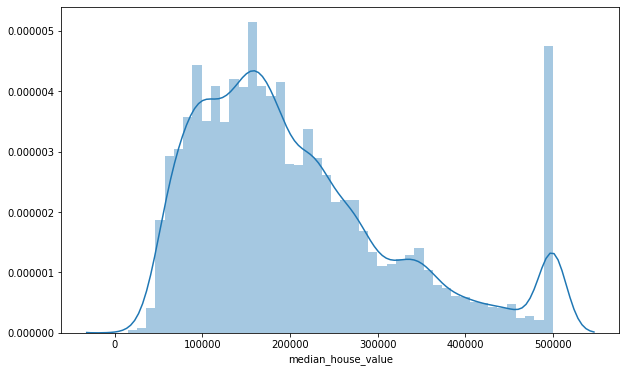

In [9]:
plt.figure(figsize=(10,6))
sns.distplot(df['median_house_value'])

In [10]:
indexMHV = df[df['median_house_value'] >= 490000.0 ].index

In [11]:
df.drop(indexMHV , inplace=True)

In [12]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


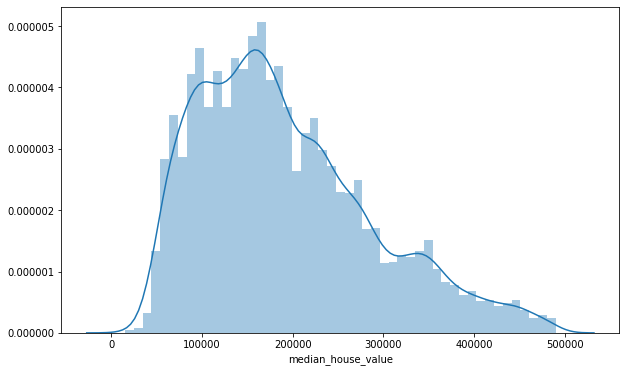

In [13]:
plt.figure(figsize=(10,6))
sns.distplot(df['median_house_value'])

In [14]:
len(df)

19608

/Applications/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Applications/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/Applications/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Applications/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


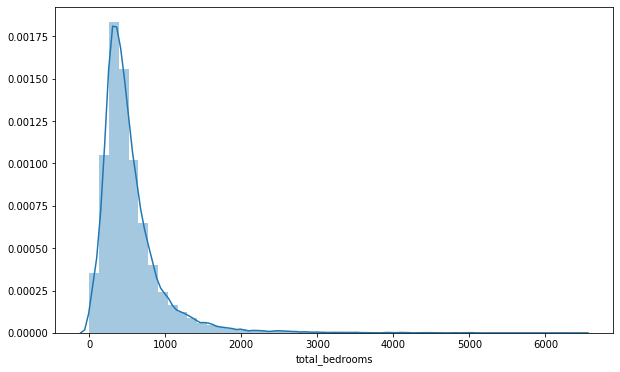

In [15]:
plt.figure(figsize=(10,6))
sns.distplot(df['total_bedrooms'],bins=50)

In [16]:
indexTB = df[df['total_bedrooms'] >= 2000.0].index

In [17]:
df.drop(indexTB , inplace=True)

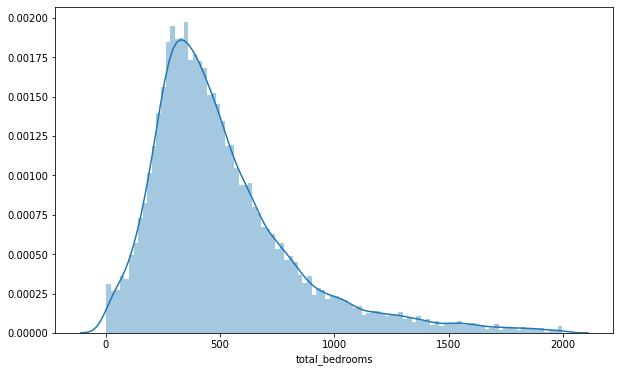

In [18]:
plt.figure(figsize=(10,6))
sns.distplot(df['total_bedrooms'],bins=100)

In [19]:
df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.923945,-0.095747,0.022097,0.055539,0.105499,0.043260,-0.010658,-0.046628
latitude,-0.923945,1.000000,0.000295,-0.015767,-0.060047,-0.124951,-0.069661,-0.077033,-0.149613
housing_median_age,-0.095747,0.000295,1.000000,-0.374918,-0.314232,-0.277503,-0.291286,-0.190982,0.067998
total_rooms,0.022097,-0.015767,-0.374918,1.000000,0.910721,0.811960,0.898710,0.251660,0.172253
total_bedrooms,0.055539,-0.060047,-0.314232,0.910721,1.000000,0.850696,0.974817,-0.004672,0.081490
population,0.105499,-0.124951,-0.277503,0.811960,0.850696,1.000000,0.885212,0.020227,0.003671
households,0.043260,-0.069661,-0.291286,0.898710,0.974817,0.885212,1.000000,0.026672,0.106035
median_income,-0.010658,-0.077033,-0.190982,0.251660,-0.004672,0.020227,0.026672,1.000000,0.644620
median_house_value,-0.046628,-0.149613,0.067998,0.172253,0.081490,0.003671,0.106035,0.644620,1.000000


In [20]:
100 * df.isnull().sum()['total_bedrooms']/df.count()['total_bedrooms']

1.0447137484329294

In [21]:
# using total_rooms to fill in remaining missing total_bedroom values

In [22]:
total_rooms_avg = df.groupby('total_rooms').mean()['total_bedrooms']

In [23]:
def fill_total_bedrooms(total_rooms,total_bedrooms):
    
    if np.isnan(total_bedrooms):
        return total_rooms_avg[total_rooms]
    else:
        return total_bedrooms

In [24]:
df['total_bedrooms'] = df.apply(lambda x:fill_total_bedrooms(x['total_rooms'],x['total_bedrooms']),axis=1)

In [25]:
df.isnull().sum()

longitude              0
latitude               0
housing_median_age     0
total_rooms            0
total_bedrooms        14
population             0
households             0
median_income          0
median_house_value     0
ocean_proximity        0
dtype: int64

In [26]:
df = df.dropna()

In [27]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [28]:
df.select_dtypes(['object']).columns

Index(['ocean_proximity'], dtype='object')

In [29]:
df['ocean_proximity'].value_counts()

<1H OCEAN     8448
INLAND        6409
NEAR OCEAN    2409
NEAR BAY      2059
ISLAND           5
Name: ocean_proximity, dtype: int64

In [30]:
df['ocean_proximity'] = df['ocean_proximity'].replace(['<1H OCEAN'],'INLAND')

In [31]:
df['ocean_proximity'].value_counts()

INLAND        14857
NEAR OCEAN     2409
NEAR BAY       2059
ISLAND            5
Name: ocean_proximity, dtype: int64

In [32]:
df['ocean_proximity'] = df['ocean_proximity'].replace(['NEAR OCEAN','NEAR BAY','ISLAND'],'NEAR WATER')

In [33]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR WATER
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR WATER
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR WATER
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR WATER
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR WATER


In [34]:
df['ocean_proximity'].value_counts()

INLAND        14857
NEAR WATER     4473
Name: ocean_proximity, dtype: int64

In [35]:
dummies = pd.get_dummies(df[['ocean_proximity']],drop_first=True)

df = pd.concat([df.drop('ocean_proximity',axis=1),dummies],axis=1)

In [36]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_NEAR WATER
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,1
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,1
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,1
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,1
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,1


In [37]:
df.rename(columns = {'ocean_proximity_NEAR WATER':'ocean_proximity'}, inplace = True)

In [38]:
len(df)

19330

In [39]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [40]:
# TRAINING AND TESTING THE DATA

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X = df.drop('ocean_proximity',axis=1).values
y = df['ocean_proximity'].values

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [44]:
from sklearn.preprocessing import MinMaxScaler

In [45]:
scaler = MinMaxScaler()

In [46]:
X_train = scaler.fit_transform(X_train)

In [47]:
X_test = scaler.transform(X_test)

In [48]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [49]:
X_train.shape

(15464, 9)

In [50]:
model = Sequential()

# input layer
model.add(Dense(9,  activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(5, activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(3, activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(3, activation='relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(units=1,activation='relu'))

# Compile model
model.compile(optimizer='adam', loss=tf.keras.losses.MeanSquaredError())

In [51]:
model.fit(x=X_train,y=y_train,epochs=100,batch_size=256,validation_data=(X_test,y_test))

Train on 15464 samples, validate on 3866 samples
Epoch 1/100
15464/15464 [==============================] - 1s 41us/sample - loss: 0.1997 - val_loss: 0.1765
Epoch 2/100
15464/15464 [==============================] - 0s 9us/sample - loss: 0.1793 - val_loss: 0.1698
Epoch 3/100
15464/15464 [==============================] - 0s 9us/sample - loss: 0.1705 - val_loss: 0.1636
Epoch 4/100
15464/15464 [==============================] - 0s 9us/sample - loss: 0.1687 - val_loss: 0.1596
Epoch 5/100
15464/15464 [==============================] - 0s 9us/sample - loss: 0.1647 - val_loss: 0.1563
Epoch 6/100
15464/15464 [==============================] - 0s 9us/sample - loss: 0.1628 - val_loss: 0.1524
Epoch 7/100
15464/15464 [==============================] - 0s 9us/sample - loss: 0.1591 - val_loss: 0.1493
Epoch 8/100
15464/15464 [==============================] - 0s 9us/sample - loss: 0.1577 - val_loss: 0.1479
Epoch 9/100
15464/15464 [==============================] - 0s 9us/sample - loss: 0.1567 - val_

In [52]:
# EVALUATING MODEL PERFORMANCE

In [53]:
losses = pd.DataFrame(model.history.history)

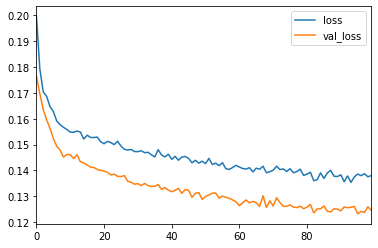

In [54]:
losses.plot()

In [55]:
# PREDICTIONS

In [56]:
from sklearn.metrics import classification_report,confusion_matrix

In [57]:
predictions = model.predict_classes(X_test)

In [58]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      2962
           1       0.87      0.50      0.63       904

    accuracy                           0.86      3866
   macro avg       0.87      0.74      0.77      3866
weighted avg       0.87      0.86      0.85      3866



In [78]:
confusion_matrix(y_test,predictions)

array([[2956,    6],
       [ 673,  231]])

In [117]:
df['ocean_proximity'].value_counts()

0    14857
1     4473
Name: ocean_proximity, dtype: int64

In [67]:
14857/len(df)

0.7685980341438179

In [68]:
# TEST

In [70]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_housing_block_data = df.drop('ocean_proximity',axis=1).iloc[random_ind]
new_housing_block_data

longitude               -119.0300
latitude                  34.2300
housing_median_age        16.0000
total_rooms             5323.0000
total_bedrooms           795.0000
population              2493.0000
households               779.0000
median_income              5.6762
median_house_value    271300.0000
Name: 20338, dtype: float64

In [74]:
new_housing_block_data = scaler.transform(new_housing_block_data.values.reshape(1,9))

In [75]:
new_housing_block_data

array([[0.53846154, 0.17959617, 0.29411765, 0.37238435, 0.39749373,
        0.22345967, 0.40426639, 0.35698128, 0.5398072 ]])

In [76]:
model.predict_classes(new_housing_block_data)

array([[0]], dtype=int32)

In [77]:
# CHECK

In [78]:
df.iloc[random_ind]['ocean_proximity']

0.0